## Setting up data frames

In [1]:
import pandas as pd
import math
import seaborn as sns
import statistics as stat

filepath_drivers = "/Users/abdullahkhan/MathMethodsforDA/MathematicalMethods/Assignment3/F1DataSet/drivers.csv"
filepath_pitstops = "/Users/abdullahkhan/MathMethodsforDA/MathematicalMethods/Assignment3/F1DataSet/pit_stops.csv"

drivers = pd.read_csv(filepath_drivers)
pitstops = pd.read_csv(filepath_pitstops)


## Dataframe configurations

In [2]:
pd.set_option('precision', 2)
pd.set_option('display.max_rows', 10000)

pitstops.shape

(7638, 7)

## Cleaning Data

In [3]:
drivers_good = drivers[drivers.code != '\\N'] # Removing all records where driver code is \N
drivers_good = drivers_good[drivers_good.number != '\\N'] # Removing all records where driver number is \N
drivers_good.shape

(45, 9)

#### Merging Drivers & Pitstops data frames to perform descriptive analysis of pitstop times

In [4]:
drivers_pitstops = pd.merge(drivers_good, pitstops, how='inner', on = 'driverId') # Merge the drivers and pitstops data frames
drivers_pitstops = drivers_pitstops[drivers_pitstops.milliseconds < 170000] # Filter out extreme values - incorrect data from 2017 Azerbaijan Grand Prix
drivers_pitstops['milliseconds'] /= 1000 # Convert milliseconds to seconds
drivers_pitstops.columns = ['driverID', 'driverRef', 'Number', 'Code' , 'Forename' , 'Surname', 'DOB', 'Nationality', 'URL', 'raceId', 'Stop', 'Lap', 'Time', 'Duration', 'Seconds'] # Rename columns
top_pitstops = drivers_pitstops.sort_values(by=['Seconds'], ascending=True) #Sort by fastest pitstop time
top_pitstops_final = top_pitstops.head(30) # Capture 30 fastest pitstop times in Formula 1 History

In [5]:
fastest_fore = [x for x in top_pitstops_final.Forename] # Creating list of top 30 fastest drivers Forename for calculating mode 
fastest_sur = [x for x in top_pitstops_final.Surname] # Creating list of top 30 fastest drivers Surname for calculating mode
mode_times = top_pitstops_final[top_pitstops_final.driverRef == stat.mode(top_pitstops_final.driverRef)] # Separating most recurring driver in top 30 to separate data frame - this will help in calculating mean

## Descriptive analysis for 30 fastest pitstop times in Formula 1

#### Measures of central tendency

In [13]:
print(f'Out of the {len(top_pitstops_final.index)} fastest pitstop times in Formula 1 history the most recurring driver with fastest pitstop times is {stat.mode(fastest_fore)} {stat.mode(fastest_sur)} ({stat.mode(top_pitstops_final.Nationality)}) with an average time of {stat.mean(mode_times.Seconds):.2f} seconds and a fastest time of {top_pitstops_final.Seconds.min():.2f} seconds')


Out of the 30 fastest pitstop times in Formula 1 history the most recurring driver with fastest pitstop times is Pastor Maldonado (Venezuelan) with an average time of 13.56 seconds and a fastest time of 12.90 seconds


In [7]:
print(f'The median time for pitstops in Formula 1 is {stat.median(drivers_pitstops.Seconds):.2f} seconds and the average time is {stat.mean(drivers_pitstops.Seconds):.2f} seconds')

The median time for pitstops in Formula 1 is 23.43 seconds and the average time is 24.47 seconds


#### Measures of variable tendency

### Charts

#### Scatter plot analysis of 30 fastest pitstops in Formula 1 History

In [8]:
%matplotlib inline

Text(0.5, 1.0, '30 Fastest Pitstops in Formula 1')

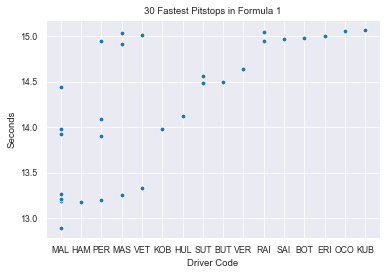

In [9]:
sns.set_style('darkgrid')
sns.set_context('paper')
scatterchart = sns.scatterplot(x = top_pitstops_final.Code, y=top_pitstops_final.Seconds) # Plotting pit stop times against driver code for 30 fastest pitstops
scatterchart.set_xlabel('Driver Code')
scatterchart.set_title(f'{len(top_pitstops_final.index)} Fastest Pitstops in Formula 1')

#### Distribution Plot of all F1 Pitstops

Text(0.5, 1.0, 'Distribution Plot of all F1 pitstops')

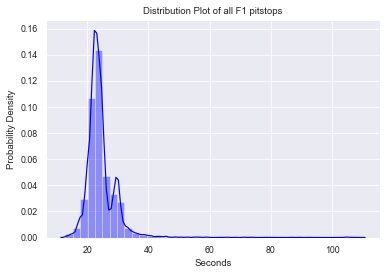

In [10]:
axes = sns.distplot(drivers_pitstops.Seconds, bins= 40, color = 'blue')
axes.set_ylabel('Probability Density')
axes.set_title('Distribution Plot of all F1 pitstops')


# Summary

• What is your dataset and why do you think it’s interesting?
• What data cleanup was required?
• Before you did the analysis, what did you hope to discover?
• What was your overall approach to analysis?
• What insights did you discover from your analysis? Will it support good decision-making?

The dataset contained 